In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv("911.csv")
column = ['latitude', 'longitude', 'description', 'zipcode', 'title', 'timestamp'
          , 'township', 'address', 'e']
df.columns = column
df.head()

,latitude,longitude,description,zipcode,title,timestamp,township,address,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [3]:
df.drop('e', axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 8 columns):
latitude       663522 non-null float64
longitude      663522 non-null float64
description    663522 non-null object
zipcode        583323 non-null float64
title          663522 non-null object
timestamp      663522 non-null object
township       663229 non-null object
address        663522 non-null object
dtypes: float64(3), object(5)
memory usage: 40.5+ MB


In [5]:
df.describe()

,latitude,longitude,zipcode
count,663522.000000,663522.000000,583323.000000
mean,40.158162,-75.300105,19236.055791
std,0.220641,1.672884,298.222637
min,0.000000,-119.698206,1104.000000
25%,40.100344,-75.392735,19038.000000
50%,40.143927,-75.305143,19401.000000
75%,40.229008,-75.211865,19446.000000
max,51.335390,87.854975,77316.000000


In [6]:
df.isna().sum()

latitude           0
longitude          0
description        0
zipcode        80199
title              0
timestamp          0
township         293
address            0
dtype: int64

In [7]:
df['description'][0]

'REINDEER CT & DEAD END;  NEW HANOVER; Station 332; 2015-12-10 @ 17:10:52;'

In [8]:
df['station_num'] = df.description.str.split('Station', expand=True)[1].str.split(';', expand=True)[0]
df.head()

,latitude,longitude,description,zipcode,title,timestamp,township,address,station_num
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,332
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,345
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,:STA27
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,308A
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,329


In [9]:
df['station_num']=df['station_num'].str.replace(':', '')

In [10]:
df['station_num']

0           332
1           345
2         STA27
3          308A
4           329
          ...  
663517     None
663518     322A
663519      313
663520    STA27
663521     None
Name: station_num, Length: 663522, dtype: object

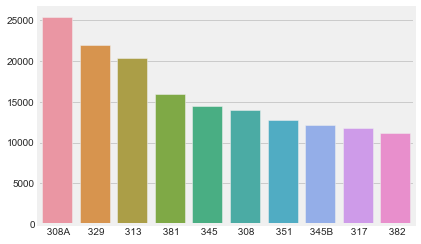

In [11]:
df_2=df.station_num.value_counts()[:10]
x=df_2.index
y=df_2.values
sns.barplot(x,y,orient="v")

In [12]:
df['zipcode'].value_counts().head()

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zipcode, dtype: int64

In [13]:
df['township'].value_counts().head()

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: township, dtype: int64

In [14]:
df['title'].value_counts().head()

Traffic: VEHICLE ACCIDENT -    148372
Traffic: DISABLED VEHICLE -     47909
Fire: FIRE ALARM                38336
EMS: FALL VICTIM                34676
EMS: RESPIRATORY EMERGENCY      34248
Name: title, dtype: int64

In [15]:
df['Reason_category'] = df['title'].apply(lambda title: title.split(': ')[0])
df['Reason_complaint'] = df['title'].apply(lambda title: title.split(':')[1]).apply(lambda title: title.split(' -')[0])

In [16]:
df.head()

,latitude,longitude,description,zipcode,title,timestamp,township,address,station_num,Reason_category,Reason_complaint
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,332,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,345,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,STA27,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,308A,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,329,EMS,DIZZINESS


In [17]:
df['Reason_category'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason_category, dtype: int64

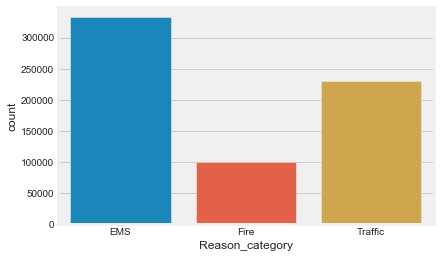

In [18]:
sns.countplot(x=df['Reason_category'],data=df)

In [19]:
df_3=df['Reason_complaint'].value_counts().head(10)
df_3.index

Index([' VEHICLE ACCIDENT', ' DISABLED VEHICLE', ' FIRE ALARM', ' FALL VICTIM',
       ' RESPIRATORY EMERGENCY', ' CARDIAC EMERGENCY', ' ROAD OBSTRUCTION',
       ' SUBJECT IN PAIN', ' HEAD INJURY', ' GENERAL WEAKNESS'],
      dtype='object')

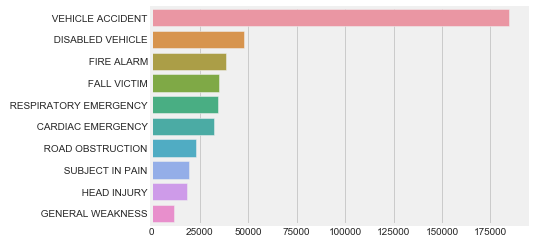

In [20]:
sns.barplot(y=df_3.index,x=df_3.values)

In [21]:
df['timestamp'] = pd.to_datetime(df.timestamp)
df['timestamp'] 

0        2015-12-10 17:10:52
1        2015-12-10 17:29:21
2        2015-12-10 14:39:21
3        2015-12-10 16:47:36
4        2015-12-10 16:56:52
                 ...        
663517   2020-07-29 15:46:51
663518   2020-07-29 15:52:19
663519   2020-07-29 15:52:52
663520   2020-07-29 15:54:08
663521   2020-07-29 15:52:46
Name: timestamp, Length: 663522, dtype: datetime64[ns]

In [22]:
df['Hour'] = df.timestamp.dt.hour
df['Month'] = df.timestamp.dt.month
df['DayOfWeek'] = df.timestamp.dt.weekday

In [23]:
df.head()

,latitude,longitude,description,zipcode,title,timestamp,township,address,station_num,Reason_category,Reason_complaint,Hour,Month,DayOfWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,332,EMS,BACK PAINS/INJURY,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,345,EMS,DIABETIC EMERGENCY,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,STA27,Fire,GAS-ODOR/LEAK,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,308A,EMS,CARDIAC EMERGENCY,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,329,EMS,DIZZINESS,16,12,3


In [24]:
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df['DayOfWeek'] = df.DayOfWeek.map(dmap)
df.DayOfWeek.value_counts()

Fri    102942
Wed     99157
Thu     98683
Tue     97684
Mon     96745
Sat     89452
Sun     78859
Name: DayOfWeek, dtype: int64

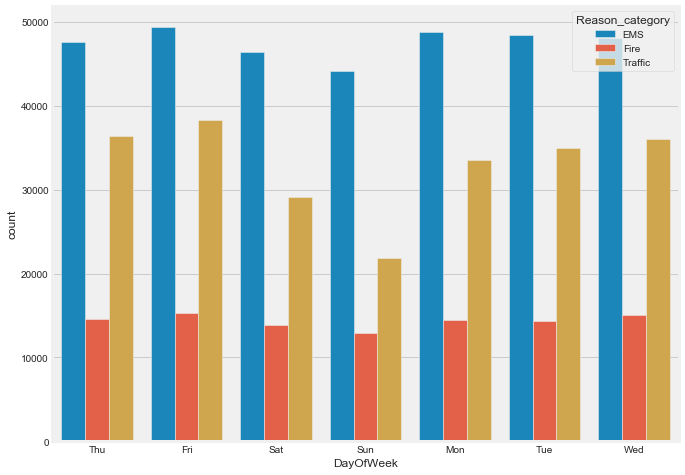

In [25]:
plt.figure(figsize=(10, 8))
sns.countplot(x=df.DayOfWeek, data=df, hue='Reason_category')

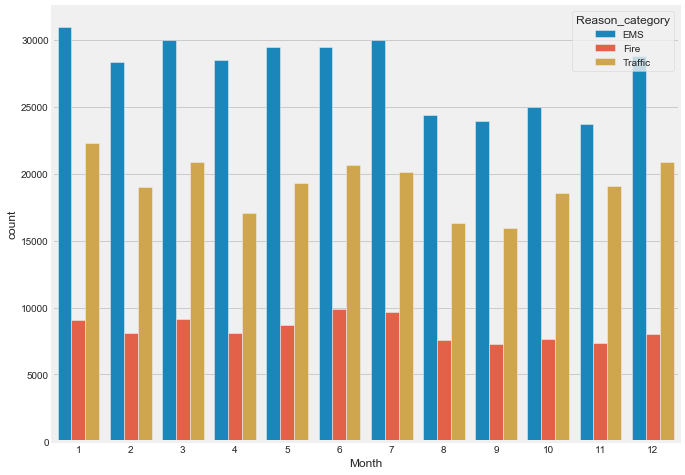

In [26]:
plt.figure(figsize=(10, 8))
sns.countplot(x=df.Month, data=df, hue='Reason_category')

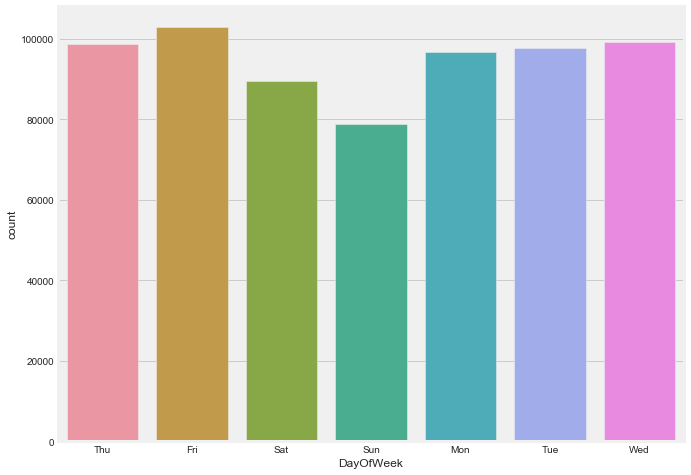

In [31]:
plt.figure(figsize=(10, 8))
sns.countplot(x=df.DayOfWeek, data=df,hue_order=[' VEHICLE ACCIDENT',' DISABLED VEHICLE',' FIRE ALARM'])

In [32]:
byMonth = df.groupby('Month').count()
byMonth

,latitude,longitude,description,zipcode,title,timestamp,township,address,station_num,Reason_category,Reason_complaint,Hour,DayOfWeek
Month,,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,40057,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,36421,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,39124,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,36617,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,38164,57509,57509,57509,57509
6,60034,60034,60034,52593,60034,60034,60005,60034,39391,60034,60034,60034,60034
7,59832,59832,59832,52507,59832,59832,59802,59832,39692,59832,59832,59832,59832
8,48359,48359,48359,42311,48359,48359,48335,48359,32008,48359,48359,48359,48359
9,47213,47213,47213,41289,47213,47213,47196,47213,31240,47213,47213,47213,47213


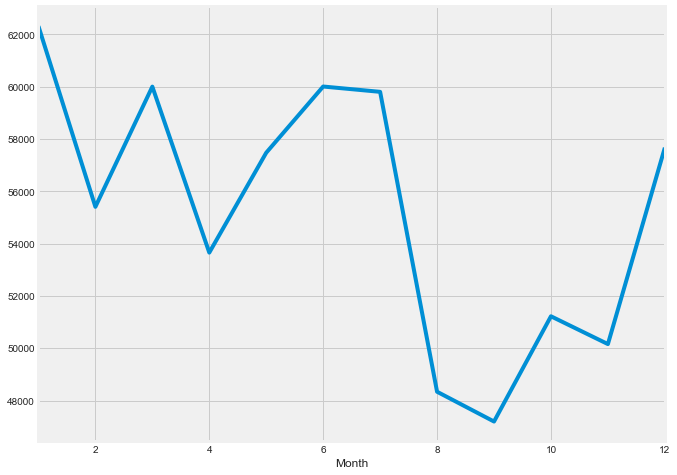

In [33]:
byMonth.township.plot(figsize=(10, 8))

<Figure size 864x576 with 0 Axes>

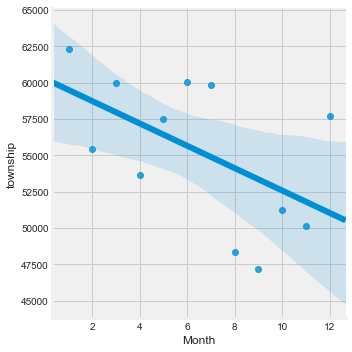

In [34]:
plt.figure(figsize=(12, 8))
sns.lmplot(x='Month',y='township',data=byMonth.reset_index())

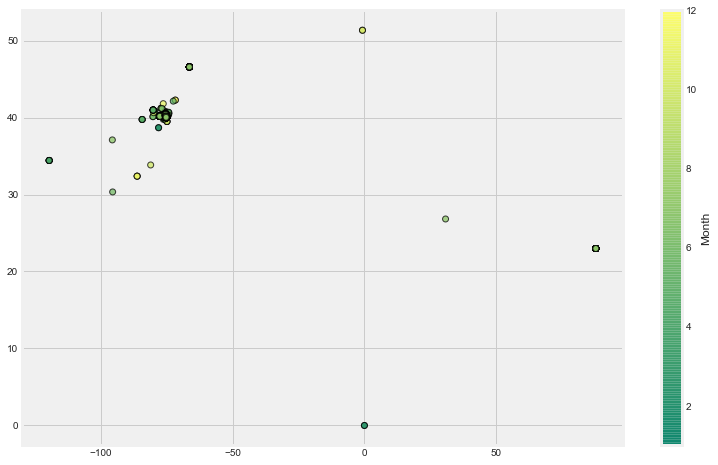

In [37]:
plt.figure(figsize=(12, 8))
plt.scatter(df.longitude, df.latitude, c=df.Month, cmap='summer', 
            edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('Month')